# Multiclass Classification dengan Algoritma Multinomial Naive Bayes dan k-Nearest Neighbors
## Latar Belakang
PT BCD mengalami kerugian besar akibat ketidaktepatan dalam menilai risiko pelanggan dalam proses pemberian pinjaman. Untuk mengatasi permasalahan ini, Andara seorang analis data di perusahaan tersebut mengajak dua rekannya, Aksara dan Antara, untuk berdiskusi dan merancang solusi berbasis machine learning.

Tim ini berfokus pada pengembangan model klasifikasi risiko pinjaman dengan pendekatan Multiclass Classification, menggunakan dua algoritma utama:

- Multinomial Naive Bayes

- k-Nearest Neighbors (k-NN)

Tujuan dari pengembangan model ini adalah untuk meningkatkan akurasi sistem penilaian risiko, sehingga perusahaan dapat meminimalkan kerugian dan membuat keputusan kredit yang lebih tepat sasaran.

## Dataset Kasus Credit Scoring
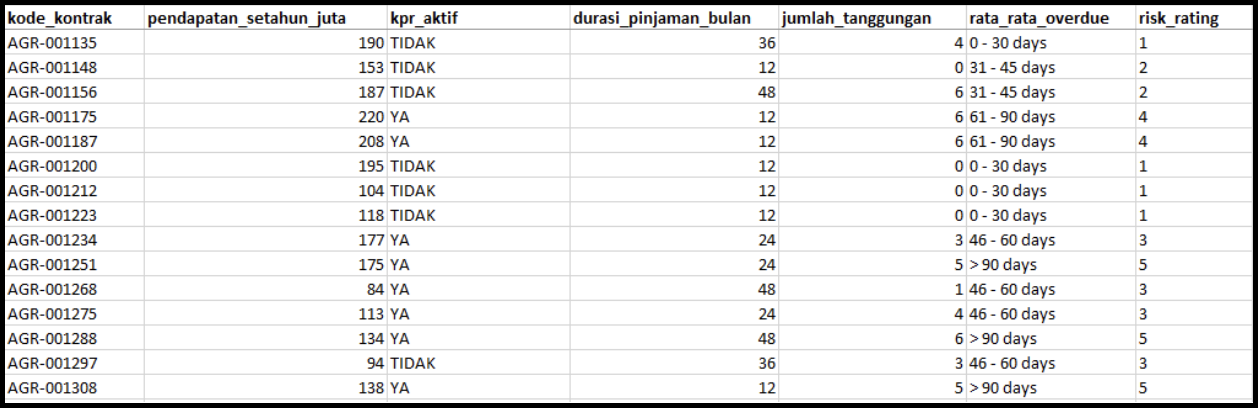
Setelah berdiskusi beberapa menit, kami menemukan pendekatan tercepat untuk memulai pengolahan data. "Dataset sudah aku dapatkan dan sudah ku kirim melalui email, bisa kamu kerjakan ya, Aksara," ucap Antara. "Baik Antara, akan aku kerjakan untuk mengawali proses pengembangan model dengan meninjau isi dataset terlebih dahulu," balas Aksara.

Dataset ini berisi informasi kontrak pinjaman pelanggan, dengan beberapa fitur utama seperti:

- pendapatan_setahun_juta: estimasi pendapatan tahunan pelanggan (dalam juta rupiah)

- kpr_aktif: status kepemilikan KPR aktif (YA/TIDAK)

- durasi_pinjaman_bulan: lama pinjaman dalam bulan

- jumlah_tanggungan: jumlah tanggungan keluarga

- rata_rata_overdue: rata-rata keterlambatan pembayaran

- risk_rating: label risiko pinjaman (target klasifikasi)

Kolom risk_rating merupakan variabel target yang menunjukkan tingkat risiko pemberian pinjaman:

- 1 → Risiko sangat rendah

- 2 → Risiko rendah

- 3 → Risiko sedang

- 4 → Risiko tinggi

- 5 → Risiko sangat tinggi

Sementara itu, kolom lainnya berfungsi sebagai fitur input yang akan digunakan untuk membangun model klasifikasi risiko. Model ini bertujuan untuk memprediksi nilai risk_rating berdasarkan karakteristik pelanggan, sehingga perusahaan dapat mengambil keputusan kredit yang lebih akurat dan efisien

### Memuat dan Menampilkan Dataset

In [45]:
#meng-import library pandas, library ini dapat kita gunakan untuk membaca data dalam format xlsx ataupun csv
import pandas as pd

#mengubah tipe data dari array y menjadi numpy array hal ini dikarenakan beberapa fungsi library scikit-learn hanya kompatibel terhadap numpy array
import numpy as np

#library yang akan kita gunakan untuk membagi dataset menggunakan strategi validasi KFold
from sklearn.model_selection import KFold

#library yang digunakan untuk menggunakan model MNB
from sklearn.naive_bayes import MultinomialNB

#library yang digunakan untuk menghitung akurasi
from sklearn.metrics import accuracy_score

#library yang digunakan untuk menggunakan model k-NN
from sklearn.neighbors import KNeighborsClassifier

#library yang digunakan untuk mencari parameterisasi
#model dengan strategi validasi KFold
from sklearn.model_selection import GridSearchCV

#library yang kita gunakan untuk menggabungkan beberapa object yang dibutuhkan dalam proses pengembangan model machine learning sebagai satu kesatuan.
#saat sebuah fungsi fit, predict, ataupun fungsi lainnya dipanggil pada object pipeline maka fungsi akan dijalankan pada setiap object di dalamnya secara berurutan
from sklearn.pipeline import Pipeline

#library yang kita gunakan untuk mengubah skalasi nilai dari setiap atribut ke dalam suatu rentang tertentu
from sklearn.preprocessing import MinMaxScaler

In [46]:
pd.set_option('display.max_column', 20)

#men-load file data.csv sebagai pandas data frame untuk mempermudah proses pengolahan data
df = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx')

#perintah untuk menampilkan 5 data pertama
print(df.head())

  kode_kontrak  pendapatan_setahun_juta kpr_aktif  durasi_pinjaman_bulan  \
0   AGR-000001                      295        YA                     48   
1   AGR-000011                      271        YA                     36   
2   AGR-000030                      159     TIDAK                     12   
3   AGR-000043                      210        YA                     12   
4   AGR-000049                      165     TIDAK                     36   

   jumlah_tanggungan rata_rata_overdue  risk_rating  
0                  5      61 - 90 days            4  
1                  5      61 - 90 days            4  
2                  0       0 - 30 days            1  
3                  3      46 - 60 days            3  
4                  0      31 - 45 days            2  


### Menghapus Kolom kode_kontrak

In [47]:
#menghilangkan kolom 'kode_kontrak' dari data frame dikarenakan kolom ini tidak relevan untuk dijadikan input dalam tugas klasifikasi (kode_kontrak tidak mempengaruhi apakah customer akan lanjut berlangganan atau tidak)
df.drop('kode_kontrak', axis=1, inplace=True)

#memeriksa 5 data teratas
print(df.head())

   pendapatan_setahun_juta kpr_aktif  durasi_pinjaman_bulan  \
0                      295        YA                     48   
1                      271        YA                     36   
2                      159     TIDAK                     12   
3                      210        YA                     12   
4                      165     TIDAK                     36   

   jumlah_tanggungan rata_rata_overdue  risk_rating  
0                  5      61 - 90 days            4  
1                  5      61 - 90 days            4  
2                  0       0 - 30 days            1  
3                  3      46 - 60 days            3  
4                  0      31 - 45 days            2  


### Memisahkan Kolom risk_rating sebagai y

In [48]:
#memeriksa rasio kemunculan label
print('Rasio kemunculan  label:')
print(pd.concat([df['risk_rating'].value_counts(), 100*df['risk_rating'].value_counts(normalize=True).rename('percentage_risk_rating')], axis=1))

Rasio kemunculan  label:
             count  percentage_risk_rating
risk_rating                               
3              291               32.333333
1              227               25.222222
2              159               17.666667
4              120               13.333333
5              103               11.444444


In [49]:
#menyimpan kolom 'rating' sebagai list ke dalam variabel y
y = df.pop('risk_rating').to_list()

In [50]:
#untuk setiap label jika nilai label = 5 maka kembalikan nilai 4
y = [4 if label == 5 else label for label in y]

In [51]:
y = np.array(y)

print('\nDataset:')
print(df.head())


Dataset:
   pendapatan_setahun_juta kpr_aktif  durasi_pinjaman_bulan  \
0                      295        YA                     48   
1                      271        YA                     36   
2                      159     TIDAK                     12   
3                      210        YA                     12   
4                      165     TIDAK                     36   

   jumlah_tanggungan rata_rata_overdue  
0                  5      61 - 90 days  
1                  5      61 - 90 days  
2                  0       0 - 30 days  
3                  3      46 - 60 days  
4                  0      31 - 45 days  


### Mengubah Nilai pada Kolom kpr_aktif ke Numerik
- 0 untuk “TIDAK”
- 1  untuk “YA”

In [52]:
#menyiapkan fungsi untuk mengubah nilai kpr_aktif
def convert_kpr_aktif(kpr_aktif):
	if kpr_aktif == 'YA':
		return 1
	return 0

#mengubah setiap nilai pada kolom kpr aktif menggunakan fungsi 'convert_kpr_aktif'
df['kpr_aktif']= df['kpr_aktif'].apply(convert_kpr_aktif)
print(df.head())

   pendapatan_setahun_juta  kpr_aktif  durasi_pinjaman_bulan  \
0                      295          1                     48   
1                      271          1                     36   
2                      159          0                     12   
3                      210          1                     12   
4                      165          0                     36   

   jumlah_tanggungan rata_rata_overdue  
0                  5      61 - 90 days  
1                  5      61 - 90 days  
2                  0       0 - 30 days  
3                  3      46 - 60 days  
4                  0      31 - 45 days  


### Mengubah Nilai pada Kolom rata_rata_overdue ke Numerik

 Mengubah nilai pada kolom ‘rata_rata_overdue’
 - “0 - 30 days” menjadi nol (0)
 - “31 - 45 days” menjadi satu (1)
 - “46 - 60 days” menjadi dua (2)
 - “61 - 90 days” menjadi tiga (3)
 - “> 90 days” menjadi empat (4)

In [53]:
#rasio kemunculan setiap kategori rata_rata_overdue
print('Rasio kemunculan  setiap kategori rata_rata_overdue:')
print(pd.concat([df['rata_rata_overdue'].value_counts(), 100*df['rata_rata_overdue'].value_counts(normalize=True).rename('percentage_rata_rata_overdue')], axis=1))

Rasio kemunculan  setiap kategori rata_rata_overdue:
                   count  percentage_rata_rata_overdue
rata_rata_overdue                                     
46 - 60 days         291                     32.333333
0 - 30 days          227                     25.222222
31 - 45 days         159                     17.666667
61 - 90 days         120                     13.333333
> 90 days            103                     11.444444


In [54]:
#fungsi untuk mengubah nilai dari kolom 'rata_rata_overdue'
def change_overdue(overdue):
	if overdue == '0 - 30 days':
		return 0
	elif overdue == '31 - 45 days':
		return 1
	elif overdue == '46 - 60 days':
		return 2
	elif overdue == '61 - 90 days':
		return 3
	else:
		return 4


In [55]:
#mengaplikasikan fungsi pada kolom 'rata_rata_overdue'
df['rata_rata_overdue'] = df['rata_rata_overdue'].apply(change_overdue)

print("\nLima baris dataset teratas:")
print(df.head())


Lima baris dataset teratas:
   pendapatan_setahun_juta  kpr_aktif  durasi_pinjaman_bulan  \
0                      295          1                     48   
1                      271          1                     36   
2                      159          0                     12   
3                      210          1                     12   
4                      165          0                     36   

   jumlah_tanggungan  rata_rata_overdue  
0                  5                  3  
1                  5                  3  
2                  0                  0  
3                  3                  2  
4                  0                  1  


### Dataset untuk Feature Matrix sebagai X

In [56]:
#merepresentasikan seluruh kolom dalam df sebagai matrik dan menampungnya dalam variabel X.
X = df.to_numpy()

#menampilkan informasi dimensi dari variabel X
print('Dimensi dari variabel X:', X.shape)

Dimensi dari variabel X: (900, 5)


### Pembagian Dataset

In [57]:
#menginisialisasi object KFold dengan jumlah kelompok data = 5 nilai random_state kita gunakan reproducibility (agar data acak yang kita dapatkan untuk setiap kelompok data selalu sama)
kf = KFold(n_splits = 5, shuffle=True, random_state = 57)

In [58]:
#meminta object kf untuk memecah data X ke sejumlah n kelompok dan mengiterasi setiap train_index dan test_index
for i, (train_index, test_index) in enumerate(kf.split(X)):
	X_train, y_train = X[train_index], y[train_index]
	X_test, y_test = X[test_index], y[test_index]

	print("Percobaan ke-", i+1)
	print("10 indeks data latih pertama:", train_index[:10])
	print("10 indeks data testing pertama:", test_index[:10])
	print("============================================================")

Percobaan ke- 1
10 indeks data latih pertama: [ 0  1  2  3  4  5  6  7  8 13]
10 indeks data testing pertama: [ 9 10 11 12 15 25 29 32 44 52]
Percobaan ke- 2
10 indeks data latih pertama: [ 0  2  4  5  6  8  9 10 11 12]
10 indeks data testing pertama: [ 1  3  7 14 20 28 37 43 49 59]
Percobaan ke- 3
10 indeks data latih pertama: [ 0  1  2  3  4  5  6  7  9 10]
10 indeks data testing pertama: [ 8 13 22 23 27 30 31 33 38 39]
Percobaan ke- 4
10 indeks data latih pertama: [ 1  3  4  5  6  7  8  9 10 11]
10 indeks data testing pertama: [ 0  2 16 17 19 21 24 35 36 42]
Percobaan ke- 5
10 indeks data latih pertama: [ 0  1  2  3  7  8  9 10 11 12]
10 indeks data testing pertama: [ 4  5  6 18 26 34 40 47 50 54]


### Pelatihan Model Klasifikasi dengan Metode Multinomial Naive Bayes

In [59]:
#menginisialisasi object KFold dengan jumlah kelompok data = 5 nilai random_state kita gunakan reproducibility (agar data acak yang kita dapatkan untuk setiap kelompok data selalu sama)
kf = KFold(n_splits = 5, shuffle=True, random_state = 57)

In [60]:
scores_test = []
scores_train = []


In [61]:
#meminta object kf untuk memecah data X ke sejumlah n kelompok dan mengiterasi setiap train_index dan test_index
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    model = MultinomialNB()
    #menspesifikasikan data latih beserta labelnya untuk dipelajari oleh model
    model.fit(X_train, y_train)
    print(f'Selesai melatih data dengan strategi validasi 5-Fold ke-{i+1}.')

Selesai melatih data dengan strategi validasi 5-Fold ke-1.
Selesai melatih data dengan strategi validasi 5-Fold ke-2.
Selesai melatih data dengan strategi validasi 5-Fold ke-3.
Selesai melatih data dengan strategi validasi 5-Fold ke-4.
Selesai melatih data dengan strategi validasi 5-Fold ke-5.


### Evaluasi Model Klasifikasi

In [62]:
#menginisialisasi object KFold dengan jumlah kelompok data = 5. nilai random_state kita gunakan reproducibility (agar data acak yang kita dapatkan untuk setiap kelompok data selalu sama)
kf = KFold(n_splits = 5, shuffle=True, random_state = 57)

scores_test = []
scores_train = []

#meminta object kf untuk memecah data X ke sejumlah n kelompok dan mengiterasi setiap train_index dan test_index
for train_index, test_index in kf.split(X):
	X_train, y_train = X[train_index], y[train_index]
	X_test, y_test = X[test_index], y[test_index]
	model = MultinomialNB()

	#menspesifikasikan data latih beserta labelnya untuk dipelajari oleh model
	model.fit(X_train, y_train)

	#meminta model yang telah dilatih untuk memprediksi data X_train
	#menampung hasil prediksi ke dalam variabel y_pred
	y_pred = model.predict(X_train)

	#menampung akurasi dari model ke variabel current_score
	current_score = accuracy_score(y_train, y_pred)

	#menambahkan skor saat ini ke list scores
	scores_train.append(current_score)

	#meminta model yang telah dilatih untuk memprediksi data X_test
	#menampung hasil prediksi ke dalam variabel y_pred
	y_pred = model.predict(X_test)

	#menampung akurasi dari model ke variabel current_score
	current_score = accuracy_score(y_test, y_pred)

	#menambahkan skor saat ini ke list scores
	scores_test.append(current_score)

print("Skor latih tertinggi: ", round(max(scores_train),2))
print("Skor latih terendah: ", round(min(scores_train),2))
print("Skor latih rata-rata: ", round(sum(scores_train)/len(scores_train),2))

print("Skor testing tertinggi: ", round(max(scores_test),2))
print("Skor testing terendah: ", round(min(scores_test),2))
print("Skor testing rata-rata: ", round(sum(scores_test)/len(scores_test),2))

Skor latih tertinggi:  0.71
Skor latih terendah:  0.68
Skor latih rata-rata:  0.7
Skor testing tertinggi:  0.76
Skor testing terendah:  0.65
Skor testing rata-rata:  0.69


Output pada potongan kode di atas menunjukkan bahwa model klasifikasi menghasilkan performa akurasi tertinggi sebesar 71%, akurasi terendah sebesar 68% dan akurasi rata-rata sebesar 70% untuk data latih. Selain itu, model klasifikasi menghasilkan performa akurasi tertinggi sebesar 76%, akurasi terendah sebesar 65% dan akurasi rata-rata sebesar 69% untuk data test.

## Metode k-Nearest Neighbors

In [63]:
#menginisialisasi object KFold dengan jumlah kelompok data = 5. nilai random_state kita gunakan reproducibility (agar data acak yang kita dapatkan untuk setiap kelompok data selalu sama)
kf = KFold(n_splits = 5, shuffle=True, random_state = 57)

scores_test = []
scores_train = []

#meminta object kf untuk memecah data X ke sejumlah n kelompok dan mengiterasi setiap train_index dan test_index
for train_index, test_index in kf.split(X):
	X_train, y_train = X[train_index], y[train_index]
	X_test, y_test = X[test_index], y[test_index]

	model = KNeighborsClassifier()

	#menspesifikasikan data latih beserta labelnya untuk dipelajari oleh model
	model.fit(X_train, y_train)

	#meminta model yang telah dilatih untuk memprediksi data X_train
	#menampung hasil prediksi ke dalam variabel y_pred
	y_pred = model.predict(X_train)

	#menampung akurasi dari model ke variabel current_score
	current_score = accuracy_score(y_train, y_pred)

	#menambahkan skor saat ini ke list scores
	scores_train.append(current_score)

	#meminta model yang telah dilatih untuk memprediksi data X_test
	#menampung hasil prediksi ke dalam variabel y_pred
	y_pred = model.predict(X_test)

	#menampung akurasi dari model ke variabel current_score
	current_score = accuracy_score(y_test, y_pred)

	#menambahkan skor saat ini ke list scores
	scores_test.append(current_score)

print("Skor latih tertinggi: ", round(max(scores_train),2))
print("Skor latih terendah: ", round(min(scores_train),2))
print("Skor latih rata-rata: ", round(sum(scores_train)/ len(scores_train),2))

print("Skor testing tertinggi: ", round(max(scores_test),2))
print("Skor testing terendah: ", round(min(scores_test),2))
print("Skor testing rata-rata: ", round(sum(scores_test)/ len(scores_test),2))

Skor latih tertinggi:  0.75
Skor latih terendah:  0.72
Skor latih rata-rata:  0.74
Skor testing tertinggi:  0.62
Skor testing terendah:  0.57
Skor testing rata-rata:  0.59


Output pada potongan kode di atas menunjukkan bahwa model klasifikasi menghasilkan performa akurasi tertinggi sebesar 75%, akurasi terendah sebesar 72% dan akurasi rata-rata sebesar 74% untuk data latih. Selain itu, model klasifikasi menghasilkan performa akurasi tertinggi sebesar 62%, akurasi terendah sebesar 57% dan akurasi rata-rata sebesar 59% untuk data test.

### Parameterisasi Model k-NN

In [64]:
clf = KNeighborsClassifier()
#parameter-parameter yang akan diujicobakan pada model
parameter_space = {
    'n_neighbors': [5, 10, 15, 20, 25],
    'metric': ['euclidean', 'manhattan']
}

#menginisialisasi object GridSearchCV pada classifier
#penjelasan terkait dengan parameter-parameter lain yang diterima pada object akan diberikan setelah potongan kode

kfold = KFold(n_splits=5, shuffle=True,random_state=57)
searcher = GridSearchCV(clf, parameter_space, scoring='accuracy', cv = kfold)

#meminta object untuk memproses data X dan y.
searcher.fit(X,y)

print("Parameter terbaik: ", searcher.best_params_)
print("Akurasi terbaik: ", searcher.best_score_)

Parameter terbaik:  {'metric': 'manhattan', 'n_neighbors': 5}
Akurasi terbaik:  0.7333333333333333


### The Power of Data Preprocessing

In [65]:
clf = Pipeline([
#menginisialisasi object MinMaxScaler untuk mengubah setiap kolom agar nilai maksimumnya sama dengan 1 dan nilai minimumnya sama dengan 0
  ('scaler', MinMaxScaler(feature_range=(0,1))),
  ('clf', KNeighborsClassifier()),
])

parameter_space = {
    'clf__n_neighbors': [2,3,4,5,6,7,8,9,11],
    'clf__metric': ['euclidean', 'manhattan']
}

kfold = KFold(n_splits=5, shuffle=True,random_state=57)
searcher = GridSearchCV(clf, parameter_space, scoring='accuracy', cv = kfold)

searcher.fit(X,y)

print("Parameter terbaik: ", searcher.best_params_)
print("Akurasi terbaik: ", searcher.best_score_)

Parameter terbaik:  {'clf__metric': 'manhattan', 'clf__n_neighbors': 6}
Akurasi terbaik:  0.9844444444444445


# Presentasi Final Model Klasifikasi Credit Scoring


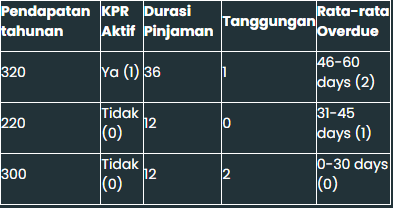


Untuk melakukan prediksi untuk ketiga data di atas:

In [66]:
#merepresentasikan ketiga data sebagai variabel X_new
X_new = [
    [320,1,36,1,2],
    [220,0,12,0,1],
    [300,0,12,2,0]
]

#perhatikan bahwa kita tidak harus melakukan skalasi terhadap X_new dan proses predict akan melakukannya untuk kita karena kita sudah menspesifikasikan object MinMaxScaler dalam object pipeline pada potongan kode sebelumnya
print(searcher.best_estimator_.predict(X_new))

[3 2 1]


jika memberikan pinjaman pada nasabah pertama akan sangat beresiko karena memiliki risk rating atau nilai resiko 3. Sementara itu, nasabah dengan kriteria kedua cukup beresiko (risk rating bernilai 2) dan pada nasabah ketiga tidak beresiko (risk rating bernilai 1).

### Renungan Senja
Berdasarkan hasil pekerjaan Aksara dan Antara, mereka berhasil mengembangkan model dengan tingkat akurasi rata-rata sampai dengan 98.44%.

Sungguh luar biasa bukan? Hanya terdapat 1.56% kesalahan prediksi yang dilakukan oleh model. Akan tetapi, sebenarnya akurasi bukanlah metrik pengukuran performa yang paling tepat dalam mencerminkan kemampuan prediktif yang dimiliki oleh suatu model klasifikasi.

Simaklah contoh kasus sederhana berikut ini.

Senja telah berhasil mengembangkan sistem pendeteksi order fiktif di salah satu perusahaan klien yang bergerak di bidang transportasi. Saat diukur menggunakan metrik akurasi, model yang ia kembangkan berhasil mencapai nilai akurasi sampai dengan 98.00%! Saat diujicobakan di perusahaan klien, ternyata, model yang diciptakan Senja selalu mengembalikan nilai “Bukan Order Fiktif” untuk setiap data yang diberikan.

Mengapa hal ini bisa terjadi?

Ternyata, setelah ditelusuri lebih lanjut, saat Senja melihat rasio jumlah data “Order Fiktif” dan “Bukan Order Fiktif” yang diberikan kepadanya, terdapat 9.800.000 data berlabel “Bukan Order Fiktif” dan hanya 200.000 data berlabel “Order Fiktif”!

Hal inilah yang menyebabkan model tetap dapat mencapai nilai akurasi sampai dengan 98.00% meskipun model hanya mengembalikan label ”Bukan Order Fiktif” untuk semua data yang diberikan kepadanya. Dalam contoh kasus ini, karena rasio data dengan label “Bukan Order Fiktif” berukuran lebih besar, jika model mengembalikan label “Bukan Order Fiktif” untuk setiap data yang diterimanya, maka total prediksi benar yang dimiliki data sudah bernilai 9.800.000. Walaupun prediksi untuk seluruh data dengan label “Order Fiktif” tidak tepat (200.000 data salah diklasifikasikan sebagai “Bukan Order Fiktif”). Model tetap dapat mencapai nilai akurasi sebesar 98.00%

    Accuracy = Total Prediksi Benar / Total Prediksi

    Accuracy = 9.800.000 / 9.800.000 + 200.000

    Accuracy = 98.00%

Berdasarkan contoh kasus di atas, dapat disimpulkan bahwa, saat komposisi/ rasio data tidak seimbang, metrik akurasi bukanlah metrik yang tepat untuk digunakan. Kemudian, kita juga dapat menyimpulkan bahwa dalam mengevaluasi performa model klasifikasi, terdapat banyak sekali faktor yang dapat kita pertimbangkan, e.g. rasio kesalahan Type 1 - underestimation (model menganggap data dengan label aktual “Order Fiktif” sebagai “Bukan Order Fiktif”) ataupun rasio kesalahan Type 2 - overestimation (model menganggap data dengan label aktual “Bukan Order Fiktif” sebagai “Order Fiktif”).

Setelah memahami hal di atas, sekarang, jika kita kembali ke model hasil pengembangan Aksara dan Antara, karena komposisi kelas dalam data yang diberikan cukup seimbang, akurasi senilai 98.00% tentunya mencerminkan bahwa aktualnya, model yang dikembangkan memiliki performa yang cukup baik. Akan tetapi, dalam kasus klasifikasi credit scoring yang sesungguhnya, performa atau benefit dari penggunaan model biasanya dihitung dengan melibatkan jumlah kesalahan Type 1, jumlah kesalahan Type 2, serta cost untuk masing-masing tipe kesalahan.